# Proyek Analisis Data: Brazilian E-Commerce Public Dataset
- **Nama:** Satria Harya Sulistyo
- **Email:** satria.harya03@gmail.com
- **ID Dicoding:** sakadyk69

## Menentukan Pertanyaan Bisnis

- Dari mana mayoritas pelanggan berasal?
- Produk apa yang paling laku dan yang jarang diminati?
- Seperti apa trend pembelian tiap bulannya?
- Apakah pelanggan puas dengan barang yang dibeli?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import matplotlib.image as mpimg

## Data Wrangling

### Gathering Data

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# Membaca dan menampilkan dataset customer besertakan lokasi
#customers = pd.read_csv('/content/drive/MyDrive/submission/data/customers_dataset.csv')
customers = pd.read_csv('./data/customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
#geolocation = pd.read_csv('/content/drive/MyDrive/submission/data/geolocation_dataset.csv')
geolocation = pd.read_csv('./data/geolocation_dataset.csv')
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
# Membaca dan menampilkan dataset yang berhubungan dengan transaksi
#order_items = pd.read_csv('/content/drive/MyDrive/submission/data/order_items_dataset.csv')
order_items = pd.read_csv('./data/order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
#order_payments = pd.read_csv('/content/drive/MyDrive/submission/data/order_payments_dataset.csv')
order_payments = pd.read_csv('./data/order_payments_dataset.csv')
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
#order_reviews = pd.read_csv('/content/drive/MyDrive/submission/data/order_reviews_dataset.csv')
order_reviews = pd.read_csv('./data/order_reviews_dataset.csv')
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
#orders = pd.read_csv('/content/drive/MyDrive/submission/data/orders_dataset.csv')
orders = pd.read_csv('./data/orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
# Membaca dan menampilkan dataset yang berhubungan dengan perusahaan
#products = pd.read_csv('/content/drive/MyDrive/submission/data/products_dataset.csv')
products = pd.read_csv('./data/products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
#sellers = pd.read_csv('/content/drive/MyDrive/submission/data/sellers_dataset.csv')
sellers = pd.read_csv('./data/sellers_dataset.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
#product_category = pd.read_csv('/content/drive/MyDrive/submission/data/product_category_name_translation.csv')
product_category = pd.read_csv('./data/product_category_name_translation.csv')
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

**Melihat informasi tiap DataFrame**

In [12]:
# Customer
print('Info DataFrame customers:')
print(customers.info(), '\n')
print('Info DataFrame geolocation:')
print(geolocation.info(), '\n')

Info DataFrame customers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None 

Info DataFrame geolocation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null 

In [13]:
# Transaksi
print('Info DataFrame order_items:')
print(order_items.info(), '\n')
print('Info DataFrame order_payments:')
print(order_payments.info(), '\n')
print('Info DataFrame order_reviews:')
print(order_reviews.info(), '\n')
print('Info DataFrame orders:')
print(orders.info(), '\n')

Info DataFrame order_items:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None 

Info DataFrame order_payments:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non

Beberapa tipe data untuk tanggal masih berupa object, maka akan disesuaikan pada tahapan selanjutnya.

In [14]:
# Perusahaan
print('Info DataFrame products:')
print(products.info(), '\n')
print('Info DataFrame sellers:')
print(sellers.info(), '\n')
print('Info DataFrame product_category:')
print(product_category.info(), '\n')

Info DataFrame products:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None 

Info DataFrame sellers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 

Untuk melihat kejanggalan pada tiap DataFrame, berikutnya dicek data kosong dan data duplikat di tiap DataFrame.

**Melihat dan mengecek data kosong tiap DataFrame**

In [15]:
# Customer
print('\nData kosong customers:\n', customers.isna().sum())
print('\nData kosong geolocation:\n', geolocation.isna().sum())


Data kosong customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Data kosong geolocation:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [16]:
# Transaksi
print('\nData kosong order_items:\n', order_items.isna().sum())
print('\nData kosong order_payments:\n', order_payments.isna().sum())
print('\nData kosong order_reviews:\n', order_reviews.isna().sum())
print('\nData kosong orders:\n', orders.isna().sum())


Data kosong order_items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Data kosong order_payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Data kosong order_reviews:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Data kosong orders:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


Pada DataFrame **order_reviews** terdapat *missing value* pada kolom review_comment_title dan review_comment_message. Lalu pada DataFrame **orders** terdapat di kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date.

In [17]:
# Perusahaan
print('\nData kosong products:\n', products.isna().sum())
print('\nData kosong sellers:\n', sellers.isna().sum())
print('\nData kosong product_category:\n', product_category.isna().sum())


Data kosong products:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Data kosong sellers:
 seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Data kosong product_category:
 product_category_name            0
product_category_name_english    0
dtype: int64


*Missing value* hanya ditemukan di DataFrame **products**, tepatnya di tiap kolom selain product_id.

**Melihat dan mengecek data duplikat di tiap DataFrame**

In [18]:
# Customer
print('Data duplikat customers:', customers.duplicated().sum())
print('Data duplikat geolocation:', geolocation.duplicated().sum())

Data duplikat customers: 0
Data duplikat geolocation: 261831


Terdapat banyak data duplikat di DataFrame geolocation. Tapi hal ini belum tentu merugikan, karena menunjukkan lokasi dengan jumlah pembeli terbanyak.

In [19]:
# Transaksi
print('Data duplikat order_items:', order_items.duplicated().sum())
print('Data duplikat order_payments:', order_payments.duplicated().sum())
print('Data duplikat order_reviews:', order_reviews.duplicated().sum())
print('Data duplikat orders:', orders.duplicated().sum())

Data duplikat order_items: 0
Data duplikat order_payments: 0
Data duplikat order_reviews: 0
Data duplikat orders: 0


In [20]:
# Perusahaan
print('Data duplikat products:', products.duplicated().sum())
print('Data duplikat sellers:', sellers.duplicated().sum())
print('Data duplikat product_category:', product_category.duplicated().sum())

Data duplikat products: 0
Data duplikat sellers: 0
Data duplikat product_category: 0


**Melihat deskripsi tiap DataFrame**

In [21]:
# Customer
print('\nDeskripsi data customers:\n', customers.describe(include='all'))
print('\nDeskripsi data geolocation:\n', geolocation.describe(include='all'))


Deskripsi data customers:
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix cu

In [22]:
# Transaksi
print('\nDeskripsi data order_items:\n', order_items.describe(include='all'))
print('\nDeskripsi data order_payments:\n', order_payments.describe(include='all'))
print('\nDeskripsi data order_reviews:\n', order_reviews.describe(include='all'))
print('\nDeskripsi data orders:\n', orders.describe(include='all'))


Deskripsi data order_items:
                                 order_id  order_item_id  \
count                             112650  112650.000000   
unique                             98666            NaN   
top     8272b63d03f5f79c56e9e4120aec44ef            NaN   
freq                                  21            NaN   
mean                                 NaN       1.197834   
std                                  NaN       0.705124   
min                                  NaN       1.000000   
25%                                  NaN       1.000000   
50%                                  NaN       1.000000   
75%                                  NaN       1.000000   
max                                  NaN      21.000000   

                              product_id                         seller_id  \
count                             112650                            112650   
unique                             32951                              3095   
top     aca2eb7d00ea1a7b8eb

In [23]:
# Perusahaan
print('\nDeskripsi data products:\n', products.describe(include='all'))
print('\nDeskripsi data sellers:\n', sellers.describe(include='all'))
print('\nDeskripsi data product_category:\n', product_category.describe(include='all'))


Deskripsi data products:
                               product_id product_category_name  \
count                              32951                 32341   
unique                             32951                    73   
top     1e9e8ef04dbcff4541ed26657ea517e5       cama_mesa_banho   
freq                                   1                  3029   
mean                                 NaN                   NaN   
std                                  NaN                   NaN   
min                                  NaN                   NaN   
25%                                  NaN                   NaN   
50%                                  NaN                   NaN   
75%                                  NaN                   NaN   
max                                  NaN                   NaN   

        product_name_lenght  product_description_lenght  product_photos_qty  \
count          32341.000000                32341.000000        32341.000000   
unique                

Tidak terdapat keganjalan dari tiap kolom di masing-masing DataFrame.

### Cleaning Data

**Mengatasi review yang kosong pada DataFrame order_reviews**

In [24]:
order_reviews[order_reviews.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [25]:
order_reviews.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

In [26]:
order_reviews['review_comment_title'].fillna(value="no title", inplace=True)

C:\Users\Sakadyk\AppData\Local\Temp\ipykernel_12836\3095223421.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews['review_comment_title'].fillna(value="no title", inplace=True)


In [27]:
count_notitle = order_reviews['review_comment_title'][order_reviews['review_comment_title'] == 'no title'].count()
print('\'no title\' count: ', count_notitle)

'no title' count:  87656


Terlihat bahwa jumlah data kosong sudah digantikan dengan pesan 'no title' dengan jumlah yang sama untuk review tanpa judul.

In [28]:
order_reviews[order_reviews.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,no title,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,no title,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,no title,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,no title,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,no title,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,no title,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,no title,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,no title,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,no title,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [29]:
order_reviews.review_comment_message.value_counts()

review_comment_message
Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                            

In [30]:
order_reviews['review_comment_message'].fillna(value="no comment", inplace=True)

C:\Users\Sakadyk\AppData\Local\Temp\ipykernel_12836\2854125361.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews['review_comment_message'].fillna(value="no comment", inplace=True)


In [31]:
count_nocomment = order_reviews['review_comment_message'][order_reviews['review_comment_message'] == 'no comment'].count()
print('\'no comment\' count: ', count_nocomment)

'no comment' count:  58247


Terlihat bahwa jumlah data kosong sudah digantikan dengan pesan 'no comment' dengan jumlah yang sama untuk review tanpa komentar.

**Mengecek data yang kosong pada DataFrame orders**

In [32]:
orders[orders.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [33]:
orders[orders.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [34]:
orders[orders.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


Terlihat bahwa kolom order_approved_at yang kosong pasti menunjukkan pesanan yang dibatalkan. Sedangkan jika kolom order_delivered_carrier_date yang kosong bisa mengindikasi pesanan yang masih diproses di pusat dan belum dikirim. Lalu untuk kolom order_delivered_customer_date yang kosong bisa juga mengindikasikan pesanan yang masih dalam perjalanan.
Maka DataFrame orders tidak perlu diubah karena data yang kosong bisa menjadi indikasi persentase pesanan yang dibatalkan.

**Mengubah data tanggal ke tipe data yang benar pada DataFrame order_items, order_reviews, dan orders**

Pada ketiga DataFrame itu terdapat data tanggal yang masih belum sesuai tipe datanya.

DataFrame order_items: kolom shipping_limit_date

DataFrame order_reviews: kolom review_creation_date, review_answer_date

DataFrame orders: kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date

In [35]:
datetime_oi = ["shipping_limit_date"]

for column in datetime_oi:
  order_items[column] = pd.to_datetime(order_items[column])

In [36]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Terlihat bahwa tipe data kolom shipping_limit_date sudah menjadi datetime

In [37]:
datetime_or = ["review_creation_date","review_answer_timestamp"]

for column in datetime_or:
  order_reviews[column] = pd.to_datetime(order_reviews[column])

In [38]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Terlihat bahwa tipe data kolom review_creation_date dan review_answer_date sudah menjadi datetime

In [39]:
datetime_oo = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_oo:
  orders[column] = pd.to_datetime(orders[column])

In [40]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Terlihat bahwa tipe data kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date sudah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore customers

In [41]:
customers.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Dari tabel di atas, terlihat bahwa sao paulo menjadi kota dengan pelanggan terbanyak.

In [42]:
customers.customer_id.is_unique

True

Dari kode di atas, dapat disimpulkan bahwa tiap kolom customer_id menghasilkan value yang unik untuk mengindikasi pesanan agar tidak tertukar. Sedangkan kolom customer_unique_id memberikan id unik ke tiap pemesan, di mana dari data ini bisa dilihat frekuensi pembelian pelanggan tersebut.

In [43]:
customers.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [44]:
customers.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Dari data di atas, terlihat 5 kota dan negara bagian/provinsi dengan pelanggan terbanyak.

### Explore geolocation

In [45]:
geolocation.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
20056       1
76370       1
63012       1
76372       1
32635       1
Length: 19015, dtype: int64

In [46]:
geolocation[geolocation['geolocation_zip_code_prefix'] == 24220].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470805,24220,-22.905817,-43.106989,niteroi,RJ
470811,24220,-22.902306,-43.112545,niteroi,RJ
470812,24220,-22.904567,-43.110491,niteroi,RJ
470820,24220,-22.902575,-43.109192,niteroi,RJ
470821,24220,-22.907500,-43.106170,niteroi,RJ


Terlihat dari hasil di atas bahwa kode pos terbanyak merupakan 24220.

### Explore orders

In [47]:
delivery_time = orders["order_delivered_customer_date"] - orders["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders["delivery_time_days"] = round(delivery_time/86400)

In [48]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days
52714,303cefa0f5b9ed6af793756df252eff5,cf4dbbb52c23ef9d9fbf701b2919afee,delivered,2018-04-11 10:48:18,2018-04-11 11:10:53,2018-04-11 23:03:34,2018-04-17 20:20:44,2018-05-07,6.0
91924,e4e3babab4d0f208cb6963df2458709d,cd06ff43889826d2ae1943fdaa68cf6e,delivered,2017-11-30 13:37:44,2017-11-30 13:56:38,2017-12-05 15:39:17,2017-12-13 14:29:11,2017-12-22,8.0
16643,2a793a414091e9c1721f07d59a3b7c39,68551474e6c22db5ce39bb7a37a4157e,delivered,2017-08-05 18:37:13,2017-08-05 18:50:19,2017-08-09 13:58:31,2017-08-17 18:21:24,2017-08-29,8.0
36131,c09f32e7ba9b4a134455b36eeff8fff3,9a8e127ee3d61981f8beea052bb5dc54,delivered,2018-03-30 11:58:04,2018-03-30 12:35:24,2018-04-04 23:57:46,2018-04-13 17:32:07,2018-04-24,9.0
34483,3f319eb09e31aa1ea2a4079bdd655c62,29ef03ca38e7360ede99ef73e193a136,delivered,2018-04-03 22:21:12,2018-04-03 22:35:13,2018-04-05 00:18:31,2018-04-07 00:19:57,2018-04-13,2.0


In [49]:
orders.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days
count,99441,99281,97658,96476,99441,96475.000000
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,9.292314
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-16.000000
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,4.000000
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,7.000000
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,12.000000
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,205.000000
std,NaN,NaN,NaN,NaN,NaN,8.776671


<Axes: >

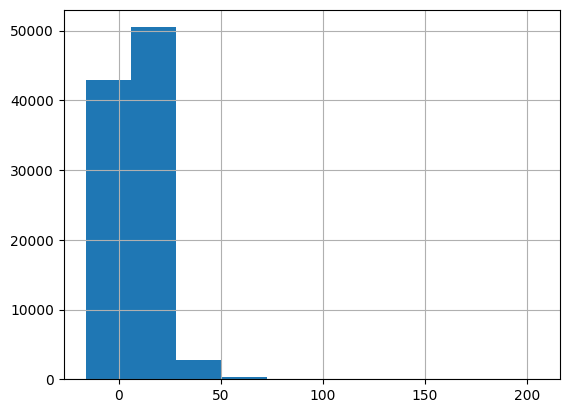

In [50]:
orders.delivery_time_days.hist()

Berdasarkan hasil tersebut, dapat diketahui bahwa rata-rata waktu pengiriman sebesar 9 hari.

In [51]:
orders.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

Dari hasil di atas juga dapat dilihat status tiap pesanan dalam tahun 2018.

### Explore order_payments

In [52]:
order_payments.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

Dari data di atas terlihat bahwa mayoritas pelanggan menggunakan kartu kredit sebagai metode pembayaran.

In [53]:
order_payments.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

Dari hasil di atas, terlihat pembayar terkecil dan terbesar yang dilakukan oleh pelanggan pada tiap metode pembayaran. Terlihat bahwa kartu kredit memiliki range nilai yang paling besar antara pembayaran terkecil dan terbesarnya.

### Explore order_reviews

In [54]:
order_reviews['review_score'].value_counts().sort_values(ascending=False)

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

Dari hasil di atas, terlihat bahwa sebagian besar pelanggan puas dengan pembelian mereka. Persentase dari hasil di atas kemudian akan diolah lebih lanjut ditahap berikutnya.

### Explore sellers

In [55]:
sellers.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

In [56]:
sellers.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64

Dari hasil di atas, terlihat 10 kota dan provinsi dengan jumlah penjual terbanyak.

### Explore products dan product_category

In [57]:
products_cat_merge = pd.merge(
    left=products,
    right=product_category,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_cat_merge.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


Dilakukan penggabungan DataFrame products dan product_category menjadi products_cat_merge karena di DataFrame products tidak terdapat kolom nama produk dalam bahasa Inggris. Dengan digabungkan kedua DataFrame itu, maka penyajian data akan menjadi lebih mudah dibaca oleh kalangan luas.

In [58]:
products_cat_merge.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(15)

product_category_name
cama_mesa_banho                3029
esporte_lazer                  2867
moveis_decoracao               2657
beleza_saude                   2444
utilidades_domesticas          2335
automotivo                     1900
informatica_acessorios         1639
brinquedos                     1411
relogios_presentes             1329
telefonia                      1134
bebes                           919
perfumaria                      868
fashion_bolsas_e_acessorios     849
papelaria                       849
cool_stuff                      789
Name: product_id, dtype: int64

In [59]:
products_cat_merge.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(15)

product_category_name_english
bed_bath_table              3029
sports_leisure              2867
furniture_decor             2657
health_beauty               2444
housewares                  2335
auto                        1900
computers_accessories       1639
toys                        1411
watches_gifts               1329
telephony                   1134
baby                         919
perfumery                    868
stationery                   849
fashion_bags_accessories     849
cool_stuff                   789
Name: product_id, dtype: int64

Di atas merupakan 15 kategori barang dengan jumlah/variasi barang terbanyak dengan penamaan dalam bahasa Inggris.

### Explore all_data_merge

In [60]:
# Penggabungan customers dan orders
customer_orders = pd.merge(
    left=customers,
    right=orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customer_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


In [61]:
# Penggabungan order_payments dan order_reviews
order_payment_review = pd.merge(
    left=order_payments,
    right=order_reviews,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payment_review.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no title,no comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,no title,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no title,no comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no title,no comment,2017-12-21,2017-12-22 01:10:39


In [62]:
# Penggabungan customer_orders dan order_payment_review
customers_order_payrev = pd.merge(
    left=customer_orders,
    right=order_payment_review,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_order_payrev.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,no title,no comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,no title,no comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,no title,no comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,no title,no comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


In [63]:
# Penggabungan order_items dan sellers
order_item_seller = pd.merge(
    left=order_items,
    right=sellers,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
order_item_seller.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [64]:
# Penggabungan order_item_seller dan products_cat_merge
order_cat_merge = pd.merge(
    left=products_cat_merge,
    right=order_item_seller,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_cat_merge.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [65]:
# Penggabungan semua DataFrame (kecuali geolocation)
all_data_merge = pd.merge(
    left=customers_order_payrev,
    right=order_cat_merge,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data_merge.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [66]:
all_data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

Penggabungan tidak memasukkan DataFrame geolocation karena tidak dibutuhkan untuk menjadi satu dengan DataFrame yang lainnya.

In [67]:
all_data_merge.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[25199 rows x 2 columns]

In [68]:
all_data_merge.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            606.97         146.42
               baby                            697.84         174.13
               bed_bath_table                  567.70         157.51
               books_general_interest          633.80         123.71
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 5533.32        1393.53
               stationery                      276.80          73.80
               telephony                      1268.12         627.34
               toys                           1864.15         423.96
               watches_gifts                  5446.89         950.02

[1356 rows x 2 columns]

Dari hasil di atas didapat pembagian kategori produk di kota dan provinsi, beserta harga dan nilai kargonya.

In [69]:
all_data_merge.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


Hasil di atas menunjukkan urutan provinsi/negara bagian dengan pendapatan terbanyak (urutan dari yang terbesar).

In [70]:
# Mengkonversi all_data_merge ke format .csv
#all_data_merge.to_csv('/content/drive/MyDrive/submission/dashboard/all_data.csv', index=False)
all_data_merge.to_csv('./dashboard/all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Dari mana mayoritas pelanggan berasal?

C:\Users\Sakadyk\AppData\Local\Temp\ipykernel_12836\2193917846.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Sakadyk\AppData\Local\Temp\ipykernel_12836\2193917846.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


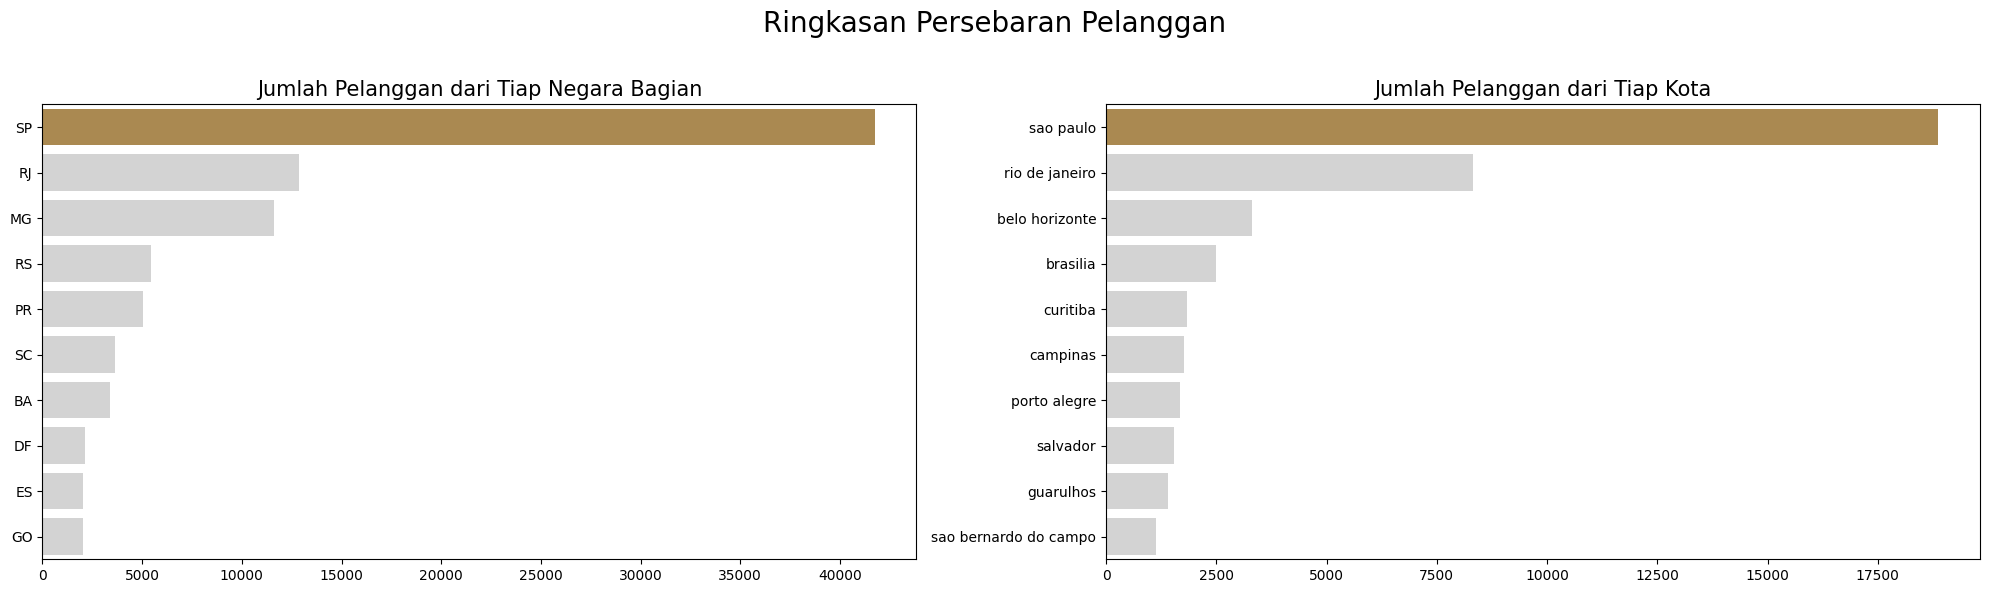

In [71]:
bystate_df = all_data_merge.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bycity_df = all_data_merge['customer_city'].value_counts().head(10)

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Plot untuk customer_count berdasarkan negara bagian
most_common_state = bystate_df.loc[bystate_df['customer_count'].idxmax(), 'customer_state']
bystate_df = bystate_df.sort_values(by='customer_count', ascending=False).head(10)
sns.barplot(
    y='customer_state',
    x='customer_count',
    data=bystate_df,
    palette=["#b98d42" if state == most_common_state else "#D3D3D3" for state in bystate_df['customer_state']],
    ax=ax[0]
)
ax[0].set_title("Jumlah Pelanggan dari Tiap Negara Bagian", fontsize=15)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

# Plot untuk customer_count berdasarkan kota
most_common_city = bycity_df.idxmax()
bycity_df = bycity_df.sort_values(ascending=False).head(10)
sns.barplot(
    y=bycity_df.index,
    x=bycity_df.values,
    palette=["#b98d42" if city == most_common_city else "#D3D3D3" for city in bycity_df.index],
    ax=ax[1]
)
ax[1].set_title("Jumlah Pelanggan dari Tiap Kota", fontsize=15)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

# Judul utama
plt.suptitle("Ringkasan Persebaran Pelanggan", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ensure the suptitle fit into the figure
plt.show()

Dari grafik di atas, dapat disimpulkan bahwa negara bagian SP dan kota sao paulo memiliki pelanggan terbanyak.

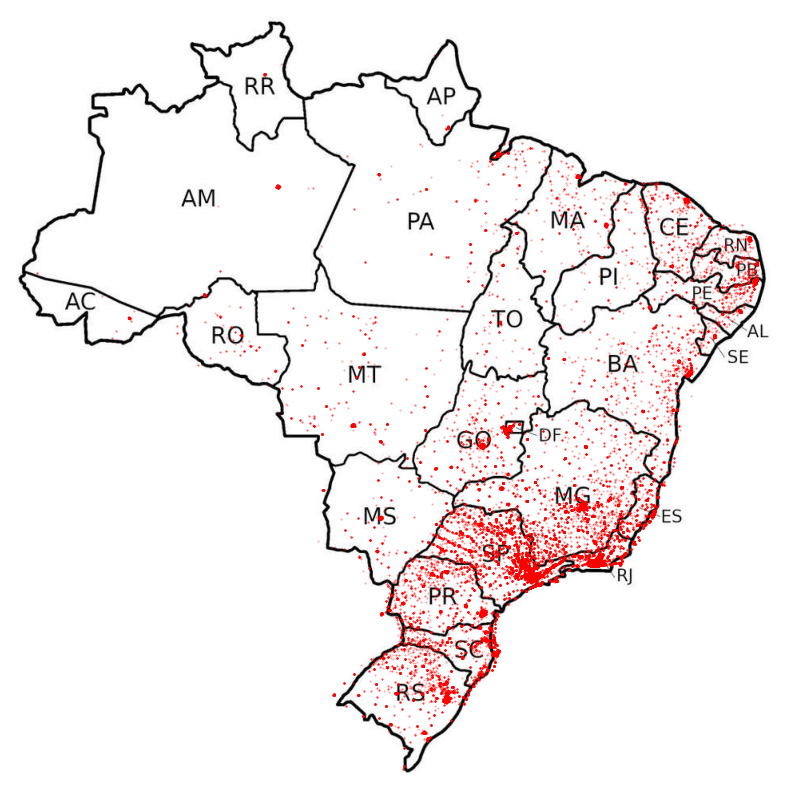

In [72]:
# Mengelompokkan data dan menghitung median lintang dan bujur
geolocation_map = geolocation.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()

# Menggabungkannya dengan customers_order_payrev
customers_map = customers_order_payrev.merge(geolocation_map,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix', how='inner')

# Menyimpan dalam format
#customers_map.to_csv('/content/drive/MyDrive/submission/dashboard/customer_plotmap.csv', index=False)
customers_map.to_csv('./dashboard/customer_plotmap.csv', index=False)

# Untuk memplot peta
def plot_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://assets.puzzlefactory.pl/puzzle/340/961/original.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='red')
    plt.axis('off')
    plt.imshow(brazil, extent=[-74.08283055, -33.8,-34.25116944,6.2])
    plt.show()

# Plot map
plot_map(customers_map.drop_duplicates(subset='customer_unique_id'))

Dari visualisasi peta plot di atas, terlihat bahwa sebagian besar pelanggan tinggal di bagian **Tenggara** dan **Selatan** dari Brazil.

### Pertanyaan 2: Produk apa yang paling laku dan yang jarang diminati?

C:\Users\Sakadyk\AppData\Local\Temp\ipykernel_12836\2710934673.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=top_5, palette=colors, ax=axs[0])
C:\Users\Sakadyk\AppData\Local\Temp\ipykernel_12836\2710934673.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=bottom_5, palette=colors, ax=axs[1])


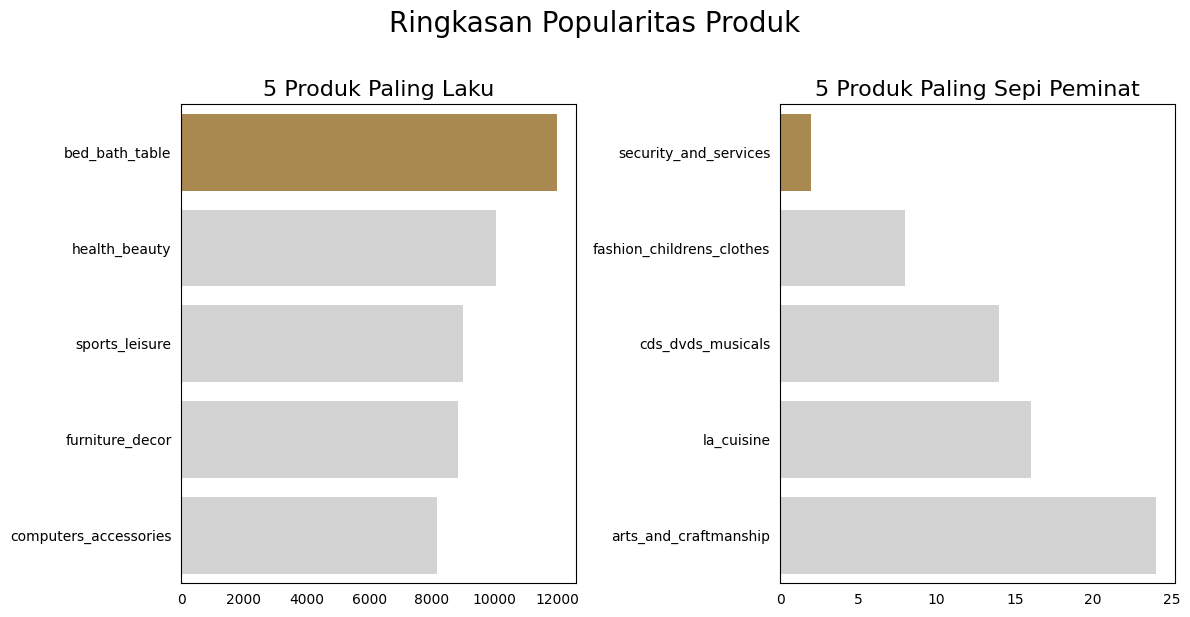

In [73]:
# Menghitung jumlah produk dan urutkan
sum_order_items_df = (
    all_data_merge.groupby("product_category_name_english")["product_id"]
    .count()
    .reset_index()
    .rename(columns={"product_id": "products"})
    .sort_values(by="products", ascending=False)
)

# Membuat subplot dan menentukan warna
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
colors = ["#b98d42", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Plot bar charts dengan formatting
top_5 = sum_order_items_df.head(5)
bottom_5 = sum_order_items_df.tail(5).sort_values(by="products", ascending=True)

sns.barplot(x="products", y="product_category_name_english", data=top_5, palette=colors, ax=axs[0])
axs[0].set_title("5 Produk Paling Laku", fontsize=16)

sns.barplot(x="products", y="product_category_name_english", data=bottom_5, palette=colors, ax=axs[1])
axs[1].set_title("5 Produk Paling Sepi Peminat", fontsize=16)

# Menghilangkan label yang tidak sesuai dan menyesuaikan layout
plt.suptitle("Ringkasan Popularitas Produk", fontsize=20, y=1.02)
for ax in axs.flat:
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.tick_params(bottom=False, left=False)
plt.tight_layout()

plt.show()

In [74]:
count_security_and_services = all_data_merge['product_category_name_english'][all_data_merge['product_category_name_english'] == 'bed_bath_table'].count()
print('security_and_services: ', count_security_and_services)
count_bed_bath_table = all_data_merge['product_category_name_english'][all_data_merge['product_category_name_english'] == 'security_and_services'].count()
print('bed_bath_table: ', count_bed_bath_table)

security_and_services:  11988
bed_bath_table:  2


Terlihat dari grafik serta pembuktian angka pada grafik, bahwa kategori barang yang paling laku adalah kategori bed_bath_table. Sedangkan kategori security_and_services paling sepi peminat.

### Pertanyaan 3: Seperti apa trend pembelian tiap bulannya?

C:\Users\Sakadyk\AppData\Local\Temp\ipykernel_12836\3993608396.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_order = all_data_merge.resample(rule='M', on='order_approved_at').agg({


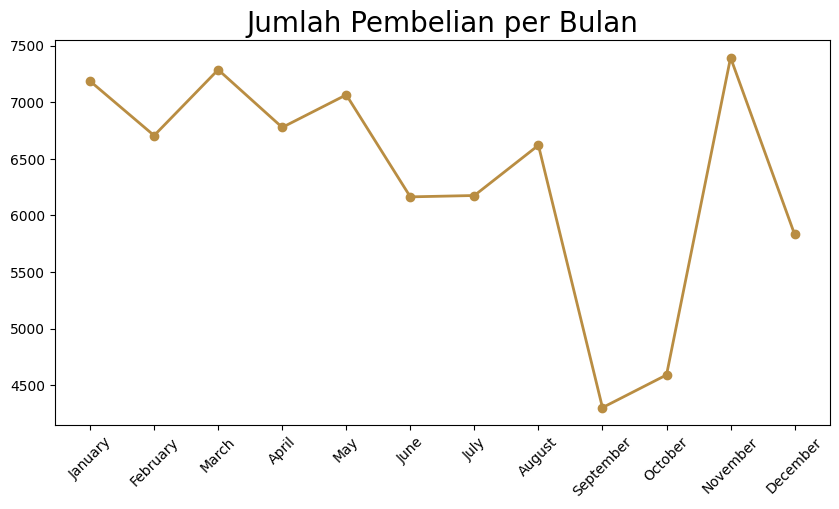

In [75]:
# Menghitung jumlah order unik per bulan dan mengubah index menjadi nama bulan
monthly_order = all_data_merge.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
})
monthly_order.index = monthly_order.index.strftime('%B')

# Mereset index DataFrame dan mengubah nama kolom 'order_id' menjadi 'order_count'
monthly_order = monthly_order.reset_index()
monthly_order.rename(columns={
    "order_id": "order_count",
}, inplace=True)

# Mengurutkan data berdasarkan 'order_count' dan menghapus duplikasi berdasarkan 'order_approved_at'
monthly_order = monthly_order.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')

# Mengubah index menjadi angka bulan dan mengurutkan data berdasarkan bulan
monthly_order['month_numeric'] = pd.to_datetime(monthly_order['order_approved_at'], format='%B').dt.month
monthly_order = monthly_order.sort_values('month_numeric')

# Membuat line chart
plt.figure(figsize=(10, 5))
plt.plot(monthly_order['order_approved_at'], monthly_order['order_count'], marker='o', linewidth=2, color="#b98d42")
plt.title("Jumlah Pembelian per Bulan", fontsize=20)
plt.xticks(rotation=45)
plt.show()

Terlihat trend pembelian pelanggan menurun signifikan di bulan September-Oktober, kemudian naik lagi di bulan November.

### Pertanyaan 4: Apakah pelanggan puas dengan barang yang dibeli?

C:\Users\Sakadyk\AppData\Local\Temp\ipykernel_12836\2661612494.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


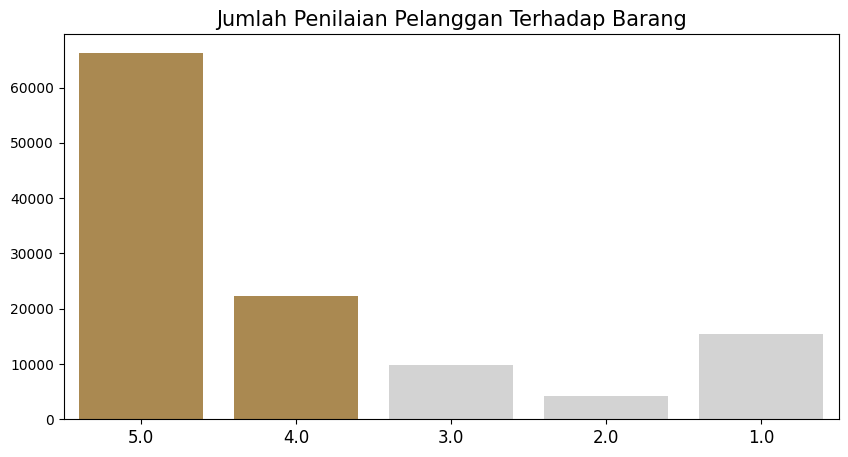

In [80]:
# Membuat bar chart
review_scores = all_data_merge['review_score'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=review_scores.index,
    y=review_scores.values,
    order=[5.0, 4.0, 3.0, 2.0, 1.0],
    palette=["#b98d42" if score == 5.0 or score == 4.0 else "#D3D3D3" for score in review_scores.index]
)

plt.title("Jumlah Penilaian Pelanggan Terhadap Barang", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(fontsize=12)
plt.show()

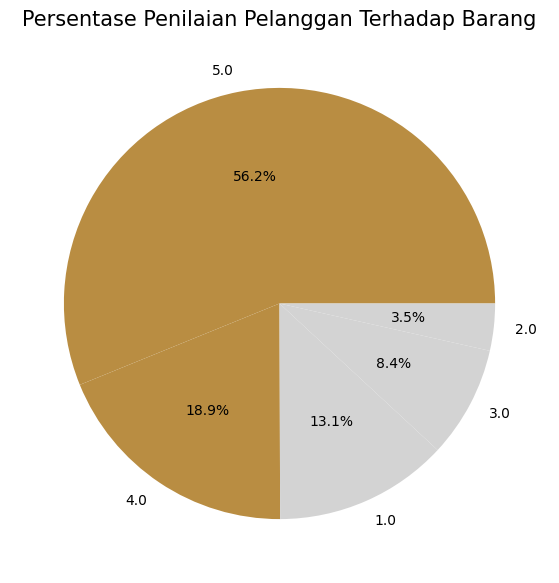

In [77]:
# Membuat pie chart
plt.figure(figsize=(10, 7))
colors = ["#b98d42" if score == 5.0 or score == 4.0 else "#D3D3D3" for score in review_scores.index]
plt.pie(review_scores.values, labels=review_scores.index, colors=colors, autopct='%1.1f%%')

plt.title("Persentase Penilaian Pelanggan Terhadap Barang", fontsize=15)
plt.show()

Terlihat bahwa mayoritas penilaian oleh pengguna ada di skor 4.0-5.0, sekitar 75.1% penilaian menghasilkan rentang skor tersebut. Hal itu menunjukkan tingkat kepuasan yang tinggi dari pelanggan mengenai barang dan jasa pengiriman yang disediakan.

## Conclusion

- Negara bagian SP dan Kota Sao Paulo memiliki pelanggan terbanyak. Sebagian besar pelanggan tinggal di bagian Tenggara dan Selatan dari Brazil.
- Kategori barang yang paling laku adalah kategori bed_bath_table. Sedangkan kategori security_and_services paling sepi peminat.
- Trend pembelian pelanggan menurun secara signifikan di bulan September hingga Oktober, kemudian naik lagi di bulan November.
- Mayoritas penilaian oleh pengguna ada di skor 4.0-5.0, sekitar 75.1% penilaian menghasilkan rentang skor tersebut. Hal itu menunjukkan tingkat kepuasan yang tinggi dari pelanggan mengenai barang dan jasa pengiriman yang disediakan.